### Stock Price Prediction using Deep Learning LSTM
Predicting the stock market has been the bane and goal of investors since its inception. Every day billions of dollars are traded on the stock exchange, and behind every dollar is an investor hoping to make a profit in one way or another.

Entire companies rise and fall daily depending on market behaviour. If an investor is able to accurately predict market movements, he offers a tantalizing promise of wealth and influence. 

Let’s see how to predict stock prices using Machine Learning and the python programming language. I will start this task by importing all the necessary python libraries that we need for this task:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv('AAPL.csv')

In [4]:
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [5]:
df.tail(3)

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1255,1255,AAPL,2020-05-20 00:00:00+00:00,319.23,319.52,316.20,316.68,27876215,319.23,319.52,316.20,316.68,27876215,0.0,1.0
1256,1256,AAPL,2020-05-21 00:00:00+00:00,316.85,320.89,315.87,318.66,25672211,316.85,320.89,315.87,318.66,25672211,0.0,1.0
1257,1257,AAPL,2020-05-22 00:00:00+00:00,318.89,319.23,315.35,315.77,20450754,318.89,319.23,315.35,315.77,20450754,0.0,1.0


In [6]:
df1= df['close']

<AxesSubplot:>

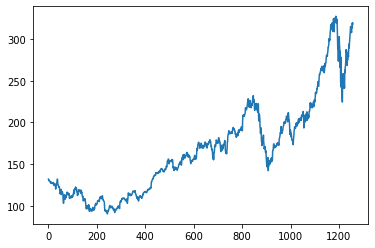

In [7]:
df1.plot()

#### Scaling 

In [8]:
df1=np.array(df1).reshape(-1,1)

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1= scaler.fit_transform(df1)

In [10]:
print(df1)

[[0.17607447]
 [0.17495567]
 [0.16862282]
 ...
 [0.96635143]
 [0.9563033 ]
 [0.96491598]]


#### Spliting data into traning and testing set

In [11]:
training_size = int(len(df1)*0.65)
test_size= len(df1)- training_size
train_data, test_data = df1[0:training_size,:], df1[training_size:len(df1),:1]

In [12]:
training_size, test_size

(817, 441)

In [13]:
train_data.shape

(817, 1)

In [14]:
train_data[:10]

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       [0.1696994 ],
       [0.16727181],
       [0.16794731],
       [0.16473866],
       [0.16174111],
       [0.1581525 ],
       [0.15654817]])

#### convert an array of values into a dataset matrix

In [15]:
import numpy

In [16]:
def create_dataset(dataset, time_step=1):
    dataX, dataY =[], []
    for i in range(len(dataset)- time_step-1):
        a= dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [17]:
#reshape into X=t, t+1, t+2, t+3 and y= t+4
time_step =100
X_train, y_train= create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [18]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [19]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

Reshaping input to be [sample, time_steps, features] which is required for LSTM

In [20]:
X_train= X_train.reshape(X_train.shape[0],X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

### Building LSTM Model

In [21]:
# Create the stacked LSTM model
from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [22]:
model = Sequential()
model.add(LSTM(50, return_sequences= True, input_shape= (100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


model fitting

In [24]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=50,batch_size=64,verbose=1)

Epoch 1/50
12/12 [==============================] - 18s 691ms/step - loss: 0.0278 - val_loss: 0.0771
Epoch 2/50
12/12 [==============================] - 3s 263ms/step - loss: 0.0054 - val_loss: 0.0048
Epoch 3/50
12/12 [==============================] - 3s 260ms/step - loss: 0.0019 - val_loss: 0.0041
Epoch 4/50
12/12 [==============================] - 3s 276ms/step - loss: 9.7211e-04 - val_loss: 0.0044
Epoch 5/50
12/12 [==============================] - 3s 269ms/step - loss: 6.8641e-04 - val_loss: 0.0058
Epoch 6/50
12/12 [==============================] - 3s 268ms/step - loss: 6.2737e-04 - val_loss: 0.0048
Epoch 7/50
12/12 [==============================] - 3s 265ms/step - loss: 6.7511e-04 - val_loss: 0.0044
Epoch 8/50
12/12 [==============================] - 3s 267ms/step - loss: 6.4007e-04 - val_loss: 0.0049
Epoch 9/50
12/12 [==============================] - 3s 270ms/step - loss: 6.5806e-04 - val_loss: 0.0048
Epoch 10/50
12/12 [==============================] - 3s 272ms/step - loss: 

In [25]:
import tensorflow as tf

In [26]:
tf.__version__

'2.4.1'

#### Predictions and Model evaluation

In [27]:
#lets do the predictions and check performance metrics
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [28]:
train_predict[:5]

array([[0.08289328],
       [0.08355097],
       [0.08427095],
       [0.08530283],
       [0.08666461]], dtype=float32)

In [30]:
y_train[:5]

array([0.0873934 , 0.09030651, 0.09891919, 0.09887697, 0.10622309])

Transformback to original form

In [31]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

Calculate RMSE performance metrics

In [54]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

139.93639966696563

In [43]:
pred_df = pd.DataFrame(test_predict)

In [45]:
y_test= scaler.inverse_transform(ytest.reshape(-1,1))

In [47]:
pred_df['TrueValues']= y_test

In [49]:
pred_df_new = pred_df.rename(columns={ 0: 'Predictions'})

In [50]:
import seaborn as sns

Text(0.5, 1.0, 'Predictions VS True values on Testing Set')

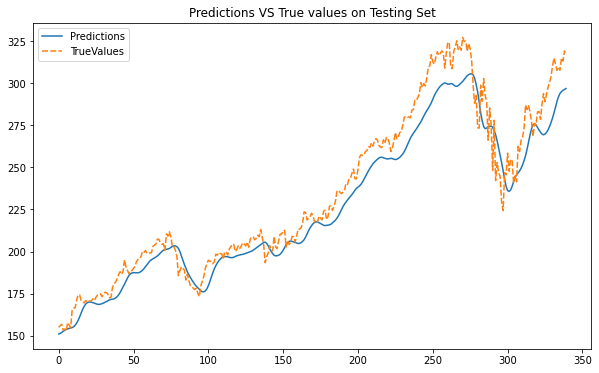

In [53]:
plt.figure(figsize=(10,6))
sns.lineplot(data= pred_df_new)
plt.title("Predictions VS True values on Testing Set")

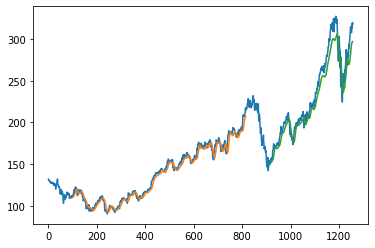

In [56]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

we are using 100 inputs for predicting 1 day output

In [57]:
x_input = test_data[341:].reshape(1,-1)

In [58]:
x_input.shape

(1, 100)

In [75]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [76]:
temp_input[0:10]

[[0.7097019336316812],
 [0.664527569028118],
 [0.6943764248923416],
 [0.692181035210673],
 [0.6356919699400492],
 [0.6526640209406402],
 [0.637802921557038],
 [0.7267162036646122],
 [0.7138816178333194],
 [0.7419150553069325]]

### Prediction for next 30 days

Now creating a function which return 30 Days Stock Prediction

In [66]:
from numpy import array

lst_output= []
n_steps= 100
i=0
while(i<30):
    if (len(temp_input)>100):
        x_input = np.array(temp_input[1:])
        print('{} day input {}'.format(i, x_input))
        
        x_input=x_input.reshape(1, -1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.99016297 0.99050072 0.96538039 0.98488559 0.97086887 0.94026007
 0.87748037 0.83483915 0.85413324 0.77336823 0.77269273 0.88014017
 0.84007431 0.89673225 0.85527316 0.83884995 0.74233725 0.82327113
 0.78143207 0.6665963  0.7921557  0.64118044 0.68614371 0.66001013
 0.65203074 0.58642236 0.56586169 0.66089673 0.65515494 0.70970193
 0.66452757 0.69437642 0.69218104 0.63569197 0.65266402 0.63780292
 0.7267162  0.71388162 0.74191506 0.75002111 0.77222832 0.83049059
 0.8194292  0.8289707  0.8125475  0.78776492 0.75162543 0.78426074
 0.77974331 0.81326522 0.8141096  0.79473106 0.83336148 0.85898843
 0.83901883 0.85628641 0.87486279 0.88782403 0.90095415 0.92793211
 0.948535   0.93333615 0.91746179 0.92544119 0.91771511 0.9483239
 0.94064004 0.96635143 0.9563033  0.96491598 0.87687105 0.87453365
 0.8672961  0.85617888 0.84246325 0.82729316 0.81154704 0.79584169
 0.78058398 0.76603091 0.75233936 0.73960197 0.72786766 0.71715653
 0.70746624 0.6987769  0.69105357 0.68424821 0.6783

10 day output [[0.624985]]
11 day input [0.88014017 0.84007431 0.89673225 0.85527316 0.83884995 0.74233725
 0.82327113 0.78143207 0.6665963  0.7921557  0.64118044 0.68614371
 0.66001013 0.65203074 0.58642236 0.56586169 0.66089673 0.65515494
 0.70970193 0.66452757 0.69437642 0.69218104 0.63569197 0.65266402
 0.63780292 0.7267162  0.71388162 0.74191506 0.75002111 0.77222832
 0.83049059 0.8194292  0.8289707  0.8125475  0.78776492 0.75162543
 0.78426074 0.77974331 0.81326522 0.8141096  0.79473106 0.83336148
 0.85898843 0.83901883 0.85628641 0.87486279 0.88782403 0.90095415
 0.92793211 0.948535   0.93333615 0.91746179 0.92544119 0.91771511
 0.9483239  0.94064004 0.96635143 0.9563033  0.96491598 0.87687105
 0.87453365 0.8672961  0.85617888 0.84246325 0.82729316 0.81154704
 0.79584169 0.78058398 0.76603091 0.75233936 0.73960197 0.72786766
 0.71715653 0.70746624 0.6987769  0.69105357 0.68424821 0.67830211
 0.67314804 0.6687116  0.66491514 0.66167694 0.65891576 0.65655029
 0.65450191 0.65269625

18 day output [[0.5978892]]
19 day input [0.6665963  0.7921557  0.64118044 0.68614371 0.66001013 0.65203074
 0.58642236 0.56586169 0.66089673 0.65515494 0.70970193 0.66452757
 0.69437642 0.69218104 0.63569197 0.65266402 0.63780292 0.7267162
 0.71388162 0.74191506 0.75002111 0.77222832 0.83049059 0.8194292
 0.8289707  0.8125475  0.78776492 0.75162543 0.78426074 0.77974331
 0.81326522 0.8141096  0.79473106 0.83336148 0.85898843 0.83901883
 0.85628641 0.87486279 0.88782403 0.90095415 0.92793211 0.948535
 0.93333615 0.91746179 0.92544119 0.91771511 0.9483239  0.94064004
 0.96635143 0.9563033  0.96491598 0.87687105 0.87453365 0.8672961
 0.85617888 0.84246325 0.82729316 0.81154704 0.79584169 0.78058398
 0.76603091 0.75233936 0.73960197 0.72786766 0.71715653 0.70746624
 0.6987769  0.69105357 0.68424821 0.67830211 0.67314804 0.6687116
 0.66491514 0.66167694 0.65891576 0.65655029 0.65450191 0.65269625
 0.65106243 0.6495353  0.64805633 0.64657342 0.64504087 0.64342153
 0.64168346 0.63980323 0.63

26 day output [[0.5700554]]
27 day input [0.66089673 0.65515494 0.70970193 0.66452757 0.69437642 0.69218104
 0.63569197 0.65266402 0.63780292 0.7267162  0.71388162 0.74191506
 0.75002111 0.77222832 0.83049059 0.8194292  0.8289707  0.8125475
 0.78776492 0.75162543 0.78426074 0.77974331 0.81326522 0.8141096
 0.79473106 0.83336148 0.85898843 0.83901883 0.85628641 0.87486279
 0.88782403 0.90095415 0.92793211 0.948535   0.93333615 0.91746179
 0.92544119 0.91771511 0.9483239  0.94064004 0.96635143 0.9563033
 0.96491598 0.87687105 0.87453365 0.8672961  0.85617888 0.84246325
 0.82729316 0.81154704 0.79584169 0.78058398 0.76603091 0.75233936
 0.73960197 0.72786766 0.71715653 0.70746624 0.6987769  0.69105357
 0.68424821 0.67830211 0.67314804 0.6687116  0.66491514 0.66167694
 0.65891576 0.65655029 0.65450191 0.65269625 0.65106243 0.6495353
 0.64805633 0.64657342 0.64504087 0.64342153 0.64168346 0.63980323
 0.6377641  0.63555425 0.63316905 0.63060844 0.62787759 0.62498498
 0.62194288 0.61876601 0.

In [62]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [63]:
len(df1)

1258

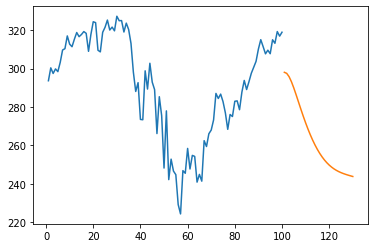

In [64]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))

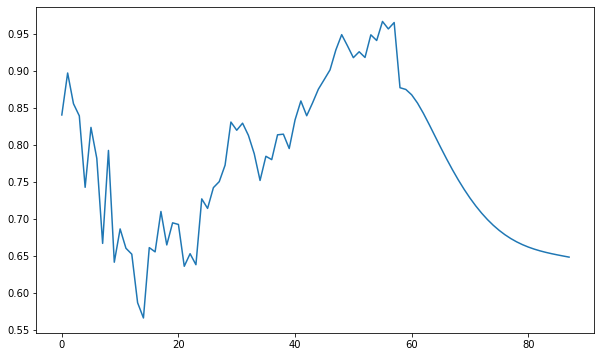

In [65]:
df3 = df1.tolist()
df3.extend(lst_output)
plt.figure(figsize=(10,6))
plt.plot(df3[1200:])